<a href="https://colab.research.google.com/github/Luis-For/CiberBullying-Detection/blob/main/Cyberbullying_Detection_using_NLP_and_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detección de Cyberbullying en Redes Sociales usando NLP y ML

**Estudiantes:**
- Camilo Andres Monsalve Garcia - 2021114054
- Sheylon Manuel Navarro Ballestas - 2020114218
- Nombre 3 - Código

**Curso:** Inteligencia Artificial
**Semestre:** 2025-II
**Docente:** Idanis Beatriz Diaz Bolao

---

### Objetivo general

Desarrollar un modelo de aprendizaje supervisado capaz de detectar y clasificar mensajes de ciberacoso (cyberbullying) en redes sociales, utilizando técnicas de Procesamiento de Lenguaje Natural (NLP). El modelo debe identificar si un texto contiene lenguaje ofensivo o discriminatorio hacia grupos por motivos de etnia/raza, religión, género/sexualidad, o si no constituye ciberacoso.

### Resumen ejecutivo
*(Breve párrafo: describe el dataset, los modelos probados, resultados y conclusiones generales)*


---

# Tabla de Contenidos
    1. Contexto y Justificación  
        I. Definición del Problema de Aprendizaje  
        II. Descripción del Dataset  
        III. Relevancia Ética y Social  

    2. Análisis Exploratorio de Datos (EDA)  
        I. Instalacion de librerias
        II. Carga y Estructura de los Datos  
        III. Distribución de Clases  
        IV. Análisis de Longitud de los Textos  
        V. Limpieza Preliminar (Nulos, Duplicados, Idioma)  
        VI. Frecuencias y Palabras más Comunes  
        VII. Visualizaciones y Hallazgos  
        VIII. Conclusiones del EDA  

    3. Preprocesamiento de Datos  
        I. Limpieza de Texto  
            A. Eliminación de menciones, URLs y caracteres especiales  
            B. Normalización y minúsculas  
            C. Sustitución por tokens `<MENTION>`, `<URL>`  
        II. Tokenización y Lematización  
        III. Generación de Features Adicionales  
        IV. Vectorización (TF-IDF, Hashing, Embeddings)  
        V. Manejo de Desbalance de Clases  
        VI. Separación del Conjunto de Datos (Train / Test / Val)  
        VII. Construcción del Pipeline  

    4. Modelado y Entrenamiento  
        I. Modelos Base  
            A. Baseline (Clase Mayoritaria)  
            B. Naive Bayes  
            C. Regresión Logística  
        II. Modelos Intermedios  
            A. Linear SVC  
            B. Random Forest  
            C. MLP (Red Neuronal Simple)  
        III. Modelos Avanzados  
            A. Fine-tuning con Transformers (DistilBERT / BERT)  
        IV. Optimización de Hiperparámetros (GridSearchCV / RandomizedSearchCV)  
        V. Validación Cruzada  

    5. Evaluación y Resultados  
        I. Métricas de Evaluación (Accuracy, F1, Recall, Precision)  
        II. Resultados en Validación Cruzada  
        III. Resultados en el Conjunto de Prueba  
        IV. Matriz de Confusión  
        V. Curvas ROC y Precision-Recall  
        VI. Comparativa Global de Modelos  

    6. Análisis de Errores e Interpretabilidad  
        I. Análisis de Falsos Positivos y Falsos Negativos  
        II. Tokens más Influyentes (Coeficientes / SHAP / LIME)  
        III. Impacto del Desbalance y Sesgo  
        IV. Discusión de Resultados y Aprendizajes  

    7. Conclusiones
        I. Conclusiones Principales  
        II. Limitaciones del Estudio  
        III. Propuestas de Mejora  
        IV. Reflexión Ética y Responsabilidad del Modelo  

    8. Apéndices
        I. Reproducibilidad (Seeds, Versiones, Entorno)  
        II. Código Auxiliar y Funciones de Apoyo  
        III. Librerías Utilizadas  
        IV. Referencias bibliograficas

# 1. Contexto y justificacion

### I. Contexto
Se entiende como el ciberbullyn el uso de algunas Tecnologías de la Información y la Comunicación como el correo electrónico, los mensajes del teléfono móvil, la mensajería instantánea, los sitios personales vejatorios y el comportamiento personal en línea difamatorio, de un individuo o un grupo, que deliberadamente, y de forma repetitiva y hostil, pretende dañar otro. [2]

Es una agresión repetitiva de uno o más individuos en contra de una persona, utilizando dispositivos o servicios de tecnología. El bullying puede darse de forma directa o indirecta, dependiendo de si la víctima identifica claramente o no a su agresor. Cuando es directo ocurre “cara a cara” y la forma indirecta puede darse, por ejemplo, con el esparcimiento de un rumor, de tal forma que la víctima no puede saber con facilidad quién lo inició. Otra clasificación se da
de acuerdo a la manera en que se origina: proactiva o reactiva. El primer caso se refiere a un hecho premeditado y planeado para obtener algo o imponerse a otras personas. El segundo se refiere a un hecho más espontáneo. [3]


como podemos darnos cuenta es algo que siempre ha existido, no son casos aislados, son casos donde el individuo que recive la agresion sufre bastante lo cual no es saludable para su salud mental. y ahi es donde entra nuestro proyecto, el entrenar modelos de deteccion de IA para que en algun punto todas las herramientas que encontramos en internet puedan implementar modelos similares con los cuales el acoso recibido a los usuarios sea suprimido, hoy en  dia ya hay plataformas que implementan herramientas similares, como lo son X (anteriormente twitter) o Facebook, las cuales si notan comentarios denigrantes, racistas, sexistas, homofobos y de esta indole al poco tiempo seran eliminados.

### II. Definición del problema

Se clasifica la definicion del problema en los siguientes datos:
- Tipo de aprendizaje: Clasificación supervisada multiclase  
- Variable objetivo: `label`  
- Entradas: texto de publicaciones (`text`)

### III. Descripción del dataset

Luego de descargar el archivo del kaggle encontramos lo siguiente:

- Fuente: Cyberbullying Detection Dataset (CC0)  
- Formato: JSON  
- Número de registros: ~99990
- Campos: `text`, `label`  
- Tamaño: 17Mb

En el archivo encontramos comentarios realizados por diversos usuarios angloparlantes de una redsocial popular, suponemos es X (anteriormente twitter). En el archivo se encuentra divido en `text` y `label`, el text da el comentario tomado y el label la clasificacion guardada en el diccionario. como ejemplo para comprender:

 `{"text":"@stylante @osuDramaDays Thanks nigga","label":"ethnicity\/race"}`

 encontramos un texto en ingles donde se etiquetan a dos personas (se asume que el arroba y el texto que sigue hasta el espacio es nickname o el nombre de usuario) donde el autor dice; "thanks nigga" el cual efectivamente se categoriza en el `label` como "ethnicity\/race" pues considera un insulto racial o etnico.


### IV. Relevancia ética y social

El trabajo es relevante social y eticamente pues hoy mas que nunca, con el auge de las tecnologias detectar rapidamente estos ataques por cualquier motivo en la red es mas necesario, vivimos en un momento donde cualquier puede expresar lo que quiera en la red y el no poder controlar o eliminar rapidamente estos comentarios hacen que las redes se llenen de odio imnecesario.

# 2. Analis exploratorio de los datos

### I. Librerias

Instalacion y carga de todas las librerias que podamos usar a lo largo de todo el notebook

In [29]:
#Cargar el google drive para poder cargar el json
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
#Instalacion para limpieza de texto y tokenizacion

!pip install --quiet unidecode transformers wordcloud langdetect emoji

#Librerias para el manejo de datos

import numpy as np
import pandas as pd
import string
import re
import nltk
import json
from unidecode import unidecode

#librerias para nlp y preprocesamiento

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from langdetect import detect
import emoji

# Descarga de recursos NLTK necesarios
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

#librerias sklearn para vectorizacion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#librerias para modelado
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments #modelado transformer
import torch

#librerias para metricas
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, ConfusionMatrixDisplay
)

#librerias para visualizar resultados
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#configuraciones generales
import warnings
warnings.filterwarnings('ignore')

# Estilo de gráficos
plt.style.use('seaborn-v0_8-muted')

# Mostrar configuración inicial
print("Librerías instaladas y cargadas correctamente.")

Librerías instaladas y cargadas correctamente.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


###II. Carga y Estructura de los Datos  

Se importan las librerias correspondientes, y se ejecuta el archivo lo cual nos trae efectivamente los primeros datos de .json



In [31]:
# Ruta del archivo JSON en Google Drive
rt_reviews = "/content/drive/MyDrive/IA/datos.json"

import pandas as pd

# Leer el archivo JSON en un DataFrame
df = pd.read_json(rt_reviews, encoding='ISO-8859-1', nrows=100000, lines=True)

# Verificar que los datos se hayan cargado correctamente
print(df.head())

                                                text              label
0  @ZubearSays Any real nigga isn't letting this ...     ethnicity/race
1  @MoradoSkittle @prolifejewess @DAConsult @Kell...  not_cyberbullying
2        the only thing i wish, i wish a nigga would     ethnicity/race
3  You saudias are not friends of Muslim idiots c...           religion
4  @JaydenT2399 @TractorLaw @holmes_gael @erconge...           religion


Aca se muestran ordenamanete via xlms los datos del archivo.json

In [32]:
df[['label','text']].head()

,label,text
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...
2,ethnicity/race,"the only thing i wish, i wish a nigga would"
3,religion,You saudias are not friends of Muslim idiots c...
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...


se modifica un poco el codigo para que nos de los valores que son distintos

In [33]:
unique_labels = df['label'].unique()
print("Unique labels in the dataset:")
print(unique_labels)

Unique labels in the dataset:
['ethnicity/race' 'not_cyberbullying' 'religion' 'gender/sexual']


En las siguientes gráfica de barras se puede apreciar el balaceo de los datos en la categorias por colores y donde como primer resultado visible tenemos que la mayoria de casos son "not cyberbulling".

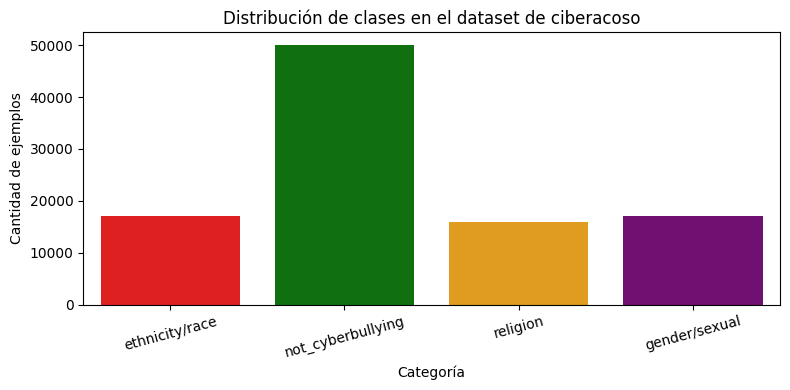

In [34]:
# Establecer el tamaño de la figura
plt.figure(figsize=(8, 4))

# Crear un countplot con las categorías del dataset de ciberacoso
sns.countplot(data=df, x='label', palette={
    'not_cyberbullying': 'green',
    'ethnicity/race': 'red',
    'religion': 'orange',
    'gender/sexual': 'purple'
})

# Configurar los ejes y etiquetas
plt.xlabel('Categoría')
plt.ylabel('Cantidad de ejemplos')
plt.title('Distribución de clases en el dataset de ciberacoso')
plt.xticks(rotation=15)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [35]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar recursos de NLTK (solo la primera vez)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab') # Added this line to download the missing resource

# Configurar idioma de las stopwords
idioma_stopwords = 'english'
stop_words = set(stopwords.words(idioma_stopwords))

def limpiar_texto(texto):
    """Función para limpiar y normalizar texto dentro del DataFrame ya cargado."""
    if not isinstance(texto, str):
        return ""
    texto = texto.lower()  # convertir a minúsculas
    # unir letras separadas (ejemplo: 'N I G G A' → 'nigga')
    texto = re.sub(r'\b(?:[a-zA-Z]\s+){1,}[a-zA-Z]\b', lambda m: ''.join(m.group(0).split()), texto)
    # eliminar menciones y URLs
    texto = re.sub(r'@\w+', '', texto)
    texto = re.sub(r'http\S+|www.\S+', '', texto)
    # eliminar caracteres no alfabéticos
    texto = re.sub(r'[^a-z\s]', '', texto)
    # tokenizar
    tokens = word_tokenize(texto)
    # eliminar stopwords
    tokens = [t for t in tokens if t not in stop_words]
    return " ".join(tokens)

# Aplicar la función de limpieza a la columna "text" del DataFrame existente
df["clean_text"] = df["text"].apply(limpiar_texto)

# Mostrar una vista previa de las nuevas columnas
df[["label", "text", "clean_text"]].head(10)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,label,text,clean_text
0,ethnicity/race,@ZubearSays Any real nigga isn't letting this ...,real nigga isnt letting happen
1,not_cyberbullying,@MoradoSkittle @prolifejewess @DAConsult @Kell...,didnt even mention mexico us far safest place ...
2,ethnicity/race,"the only thing i wish, i wish a nigga would",thing wish wish nigga would
3,religion,You saudias are not friends of Muslim idiots c...,saudias friends muslim idiots cheapless people
4,religion,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,yet maga want judah christian muslim believe s...
5,ethnicity/race,@areyalldizzy @soobroll wait its so bad………. th...,wait bad nigga got rabies
6,not_cyberbullying,A voting machine error in New Jersey flipped t...,voting machine error new jersey flipped outcom...
7,religion,"@Leeo2680 @KeaweWong Now in President Jokowi, ...",president jokowi situation better indonesian c...
8,ethnicity/race,@NaTuRaLbeautyME @Phil_Lewis_ Agreed @NaTuRaLb...,agreed used tell history students birth certif...
9,not_cyberbullying,"Linked in an email, 'Sarah, you're on a roll w...",linked email sarah youre roll career incredibl...


###  Nube de Palabras (WordCloud)

En este bloque de código se genera una **nube de palabras (WordCloud)** para cada categoría del conjunto de datos.  
Esta visualización permite **identificar las palabras más frecuentes** dentro de los textos asociados a cada tipo de etiqueta (*not_cyberbullying*, *ethnicity/race*, *religion*, *gender/sexual*).  

De esta manera, es posible **evidenciar los términos más representativos y repetitivos** en cada clase, lo cual facilita una **comprensión inicial del lenguaje y los patrones** que caracterizan los mensajes ofensivos o no ofensivos en redes sociales.


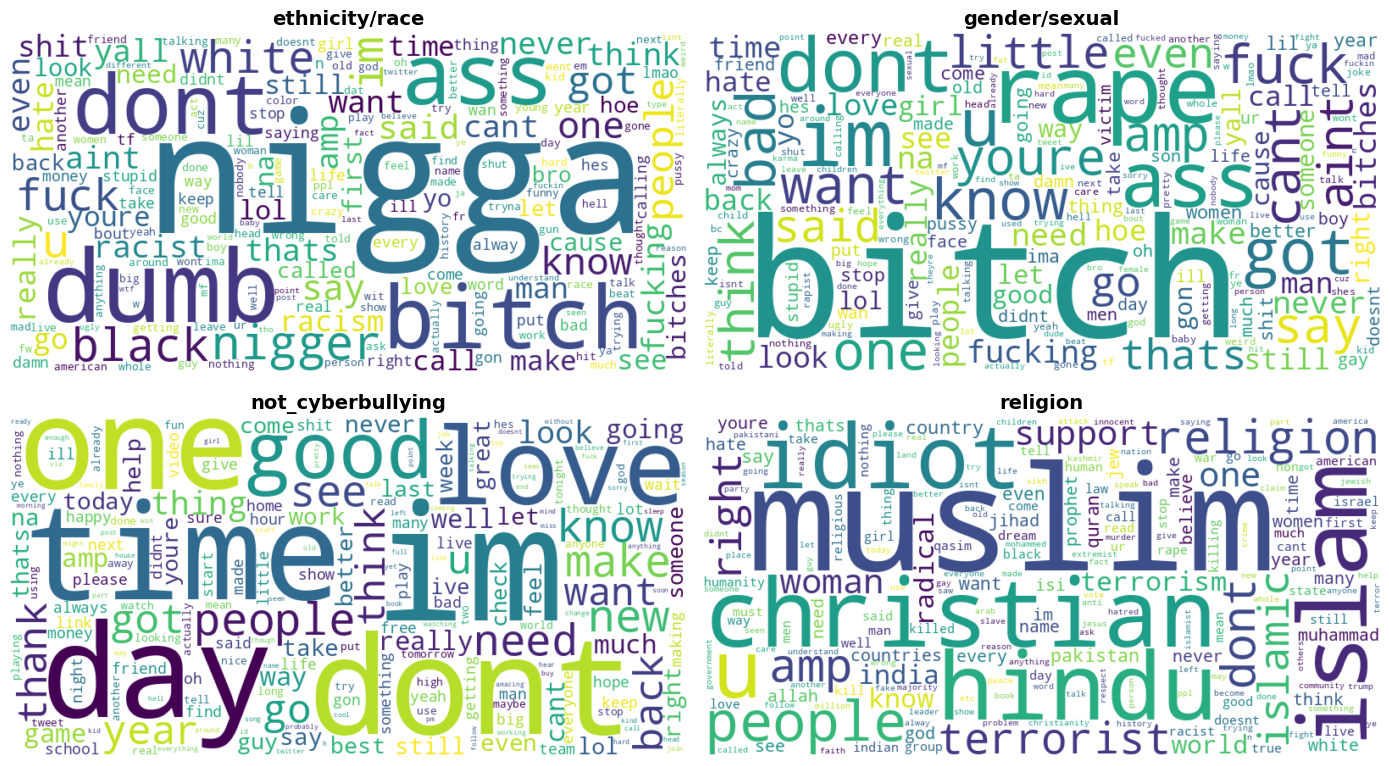

In [36]:
# Importar las librerías necesarias
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Agrupar las palabras por categoría (etiqueta)
# Se asume que 'df' contiene las columnas 'label' y 'text'
palabras_por_categoria = df.groupby('label')['clean_text'].apply(lambda x: ' '.join(x.astype(str)))

# Crear un WordCloud para cada categoría
wordclouds = {}
for categoria, texto in palabras_por_categoria.items():
    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        collocations=False
    ).generate(texto)
    wordclouds[categoria] = wc

# Mostrar los WordClouds para cada categoría
plt.figure(figsize=(14, 8))

for i, (categoria, wc) in enumerate(wordclouds.items(), start=1):
    plt.subplot(2, 2, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(categoria, fontsize=14, weight='bold')
    plt.axis('off')

plt.tight_layout()
plt.show()



# Resumen estadistico
El dataset se encuentra conformado por **99.990** filas los cuales constan de una cadena de diferente longitudes con multiples palabras entre edad resultantes solo las que no son palabras vacias y tienen un significado

In [40]:
from tabulate import tabulate #libreria para imprimir como tabla
# Asegurarse de que la columna 'clean_text' exista
if 'clean_text' in df.columns:
    print("\n-- Estadísticas de texto por etiqueta (word_count, char_count) --")

    # Crear columnas con conteo de palabras y caracteres
    df['word_count'] = df['clean_text'].apply(lambda x: len(str(x).split()))
    df['char_count'] = df['clean_text'].apply(lambda x: len(str(x)))

    # Agrupar por etiqueta ('label')
    stats_by_label = df.groupby('label')[['word_count', 'char_count']].agg(
        ['count', 'mean', 'median', 'std', 'min', 'max']
    )

    # Formato más legible de columnas
    stats_by_label.columns = ['_'.join(col).strip() for col in stats_by_label.columns.values]

    # Mostrar resultados
    #print(stats_by_label)
    print(tabulate(stats_by_label, headers='keys', tablefmt='fancy_grid'))
else:
    print("ERROR! No se encontró la columna 'clean_text' en el DataFrame.")



-- Estadísticas de texto por etiqueta (word_count, char_count) --
╒═══════════════════╤════════════════════╤═══════════════════╤═════════════════════╤══════════════════╤══════════════════╤══════════════════╤════════════════════╤═══════════════════╤═════════════════════╤══════════════════╤══════════════════╤══════════════════╕
│ label             │   word_count_count │   word_count_mean │   word_count_median │   word_count_std │   word_count_min │   word_count_max │   char_count_count │   char_count_mean │   char_count_median │   char_count_std │   char_count_min │   char_count_max │
╞═══════════════════╪════════════════════╪═══════════════════╪═════════════════════╪══════════════════╪══════════════════╪══════════════════╪════════════════════╪═══════════════════╪═════════════════════╪══════════════════╪══════════════════╪══════════════════╡
│ ethnicity/race    │              17000 │          11.1961  │                   9 │          7.70523 │                1 │               45 │      

# Matriz de correlación:



Primeras filas de las características extraídas:
   word_count  char_count  unique_word_count  avg_word_length  lexical_diversity
0         5.0        30.0                5.0         5.200000               1.00
1         9.0        51.0                9.0         4.777778               1.00
2         5.0        27.0                4.0         4.600000               0.80
3         6.0        46.0                6.0         6.833333               1.00
4        23.0       167.0               23.0         6.304348               1.00
5         5.0        25.0                5.0         4.200000               1.00
6        16.0       100.0               16.0         5.312500               1.00
7        19.0       152.0               19.0         7.052632               1.00
8        25.0       169.0               22.0         5.800000               0.88
9        13.0        89.0               13.0         5.923077               1.00

Matriz de correlación (Pearson):
                   word_c

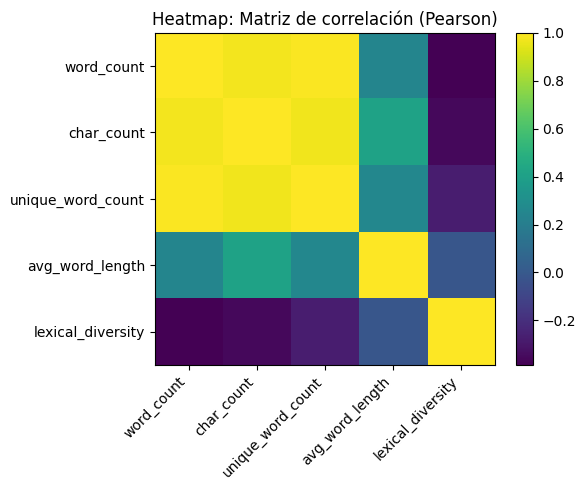

OSError: Cannot save file into a non-existent directory: '/mnt/data'

In [41]:
# Código que calcula una matriz de correlación entre características textuales extraídas de `df`,
# la muestra como DataFrame y dibuja un mapa de calor (heatmap) usando matplotlib.
# También presenta la tabla con caas_jupyter_tools.display_dataframe_to_user si está disponible
# para una visualización tipo hoja de cálculo.
#
# Requisitos previos: antes de ejecutar este bloque, `df` debe existir en el entorno y debe
# contener la columna 'clean_text' (texto ya preprocesado). Si no existe, el bloque avisará.
#
# Características calculadas:
# - word_count: número de palabras
# - char_count: número de caracteres
# - avg_word_length: longitud media de palabra
# - unique_word_count: número de palabras únicas
# - lexical_diversity: unique_word_count / word_count (0 si word_count==0)
#
# Luego calcula la matriz de correlación Pearson sobre estas columnas y la muestra.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate #libreria para imprimir como tabla

# función para asegurarnos de usar df del entorno si existe
try:
    df  # comprobar si df existe
except NameError:
    raise RuntimeError("No se encontró un DataFrame llamado 'df' en el entorno. Crea 'df' con la columna 'clean_text' antes de ejecutar este bloque.")

if 'clean_text' not in df.columns:
    raise RuntimeError("El DataFrame existe pero no contiene la columna 'clean_text'. Ejecuta la limpieza de texto primero.")

# Crear columnas numéricas a partir de 'clean_text'
def extract_text_features(s):
    s = "" if pd.isna(s) else str(s)
    words = s.split()
    word_count = len(words)
    char_count = len(s)
    unique_word_count = len(set(words))
    avg_word_length = (sum(len(w) for w in words) / word_count) if word_count > 0 else 0.0
    lexical_diversity = (unique_word_count / word_count) if word_count > 0 else 0.0
    return pd.Series({
        'word_count': word_count,
        'char_count': char_count,
        'unique_word_count': unique_word_count,
        'avg_word_length': avg_word_length,
        'lexical_diversity': lexical_diversity
    })

features_df = df['clean_text'].apply(extract_text_features)
# Adjuntar al df original (opcional; comentado para no modificar el df a menos que el usuario quiera)
# df = pd.concat([df, features_df], axis=1)

# Mostrar las primeras filas de las características extraídas
print("\nPrimeras filas de las características extraídas:")
display_df = features_df.head(10).copy()
try:
    # mostrar en formato tabla interactiva si la herramienta está disponible
    import caas_jupyter_tools as cjt
    cjt.display_dataframe_to_user("Características de texto (muestra)", display_df)
except Exception:
    print(display_df.to_string())

# Calcular matriz de correlación (Pearson)
corr_matrix = features_df.corr(method='pearson')

print("\nMatriz de correlación (Pearson):")
print(corr_matrix.to_string())

# Mostrar la matriz como heatmap con matplotlib (una sola figura/plot)
plt.figure(figsize=(6, 5))
plt.imshow(corr_matrix, aspect='auto', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title('Heatmap: Matriz de correlación (Pearson)')
plt.tight_layout()
plt.show()

# Guardar la matriz en un csv temporal por si el usuario quiere descargarla
corr_csv_path = "/mnt/data/correlation_matrix.csv"
corr_matrix.to_csv(corr_csv_path)
print(f"\nLa matriz de correlación también se guardó en: {corr_csv_path}")


# 8. Apendice
### I. hola
### II. hola
### III. hola
### IV. Referencias bibliograficas
[1] Kaggle. (2023). Cyberbullying Detection Dataset. CC0: Public Domain.  
[2] Prados, M. Á. H., & Fernández, I. M. S. (2007). Ciberbullying, un problema de acoso escolar. RIED-Revista iberoamericana de educación a distancia, 10(1), 17-36.  
[3]Luna, R. A. (2014). Cyberbullying: acoso utilizando medios electrónicos.
